In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import scale, robust_scale
from sklearn.decomposition import PCA
%matplotlib inline

### 4. 레버리지 및 아웃라이어 분석

In [2]:
# Load the Dataset
X = pd.read_csv('train.csv')

X.tail()

,Season,NAT,Club_Name,TSR,STR,PDO,Pass_Success,Possesion,Team_Value,AGE,FPPsq,Country Score,Rating,Pts
476,1516,GER,Wolfsburg,0.551852,0.560662,893.8322,0.820588,0.578824,7.58,24.5,0.542857,79.415,6.85,56.035
477,1516,GER,Eintracht Frankfurt,0.458194,0.439859,953.9767,0.721765,0.471765,2.50,23.9,0.571429,79.415,6.69,28.035
478,1516,GER,Borussia,0.493404,0.536775,949.0774,0.795152,0.556667,4.81,24.4,0.586207,79.415,6.94,42.035
479,1516,GER,Mainz 05,0.445851,0.466027,946.8986,0.720000,0.461471,1.73,24.3,0.564103,79.415,6.84,18.035
480,1516,GER,Augsburg,0.437485,0.446503,1082.3060,0.747647,0.468824,1.60,24.9,0.512821,79.415,6.80,23.035


In [3]:
#변수로 쓰지 않을 column 제거
del X["Season"]
del X["NAT"]
del X["Club_Name"]
X.tail()

,TSR,STR,PDO,Pass_Success,Possesion,Team_Value,AGE,FPPsq,Country Score,Rating,Pts
476,0.551852,0.560662,893.8322,0.820588,0.578824,7.58,24.5,0.542857,79.415,6.85,56.035
477,0.458194,0.439859,953.9767,0.721765,0.471765,2.50,23.9,0.571429,79.415,6.69,28.035
478,0.493404,0.536775,949.0774,0.795152,0.556667,4.81,24.4,0.586207,79.415,6.94,42.035
479,0.445851,0.466027,946.8986,0.720000,0.461471,1.73,24.3,0.564103,79.415,6.84,18.035
480,0.437485,0.446503,1082.3060,0.747647,0.468824,1.60,24.9,0.512821,79.415,6.80,23.035


In [6]:
# Scale
dfX0 = X[[x for x in [0,1,2,3,4,5,6,7,8,9]]]
dfy = X[['Pts']]
Scale_data = scale(dfX0)
dfX0.head()

,TSR,STR,PDO,Pass_Success,Possesion,Team_Value,AGE,FPPsq,Country Score,Rating
0,0.628058,0.611384,1052.258,0.800789,0.581842,11.00,25.0,0.666667,79.499,7.19
1,0.680405,0.720911,1035.715,0.737797,0.615692,15.85,26.8,0.714286,79.499,7.30
2,0.629660,0.620096,1018.346,0.809211,0.597632,6.24,21.7,0.688889,79.499,7.17
3,0.561334,0.567709,1026.935,0.759474,0.522105,6.08,23.3,0.487805,79.499,7.19
4,0.606972,0.546114,1005.435,0.777368,0.585789,11.22,24.4,0.800000,79.499,7.04


### PCA 적용

In [8]:
A = np.array(Scale_data) 
pca = PCA().fit(A)

In [9]:
pca = PCA(n_components=5).fit(A)

In [10]:
pca.components_.T.shape
soccer_PCA_analysis = pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"], 
                                   index = dfX0.columns)
soccer_PCA_analysis

,PC1,PC2,PC3,PC4,PC5
TSR,0.320913,-0.276918,-0.444801,0.079760,-0.086319
STR,0.411223,0.162802,-0.016865,0.144534,-0.174635
PDO,0.208648,0.294922,0.517871,-0.228252,0.601846
Pass_Success,0.394824,0.138201,-0.096569,0.117614,0.151686
Possesion,0.420964,0.145239,-0.062862,0.146547,-0.028692
Team_Value,0.400406,-0.214424,0.176314,-0.038025,-0.177763
AGE,-0.011769,-0.445354,0.385594,0.768908,0.198709
FPPsq,0.136733,-0.504761,-0.351397,-0.286494,0.605112
Country Score,0.087044,-0.511256,0.450046,-0.446360,-0.349106
Rating,0.405640,0.095683,0.120872,-0.106581,-0.129930


In [11]:
# PCA 분석으로 OLS Summary 
pca_s = PCA(5).fit_transform(A)
T_features = pd.DataFrame(pca_s, columns = ["PC1","PC2","PC3","PC4","PC5"])
regression = "dfy ~ PC1 + PC2 + PC3 + PC4 + PC5"
model = sm.OLS.from_formula(regression, data = T_features)
result = model.fit()

print (result.summary())
coef = np.array(result.params) # coef 만 출력

                            OLS Regression Results                            
Dep. Variable:                    dfy   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 26 Dec 2016   Prob (F-statistic):          7.97e-110
Time:                        06:31:22   Log-Likelihood:                -2162.9
No. Observations:                 481   AIC:                             4338.
Df Residuals:                     475   BIC:                             4363.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     51.1599      0.996     51.362      0.0

### PCA로 모델링 한 후 레버리지 & 아웃라이어 분석

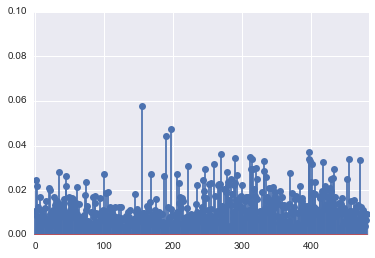

hat.sum() = 6.0


In [12]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([-2, len(dfy)+2, 0, 0.1])
plt.show()
print("hat.sum() =", hat.sum())

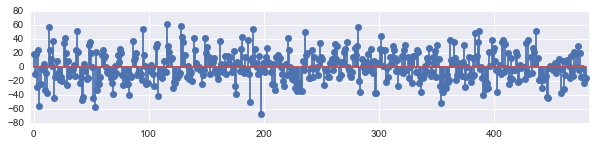

In [13]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.xlim([-2, len(dfy)+2])
plt.show()

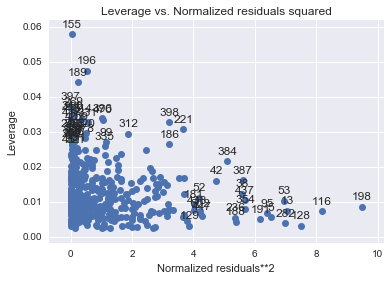

In [14]:
# Leverage와 잔차 상관관계 분석 결과

sm.graphics.plot_leverage_resid2(result)
plt.show()

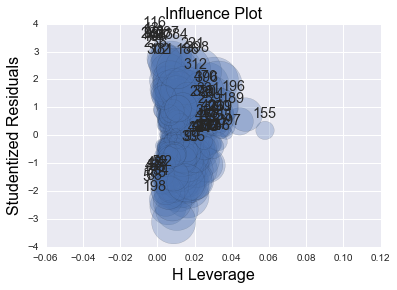

In [15]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

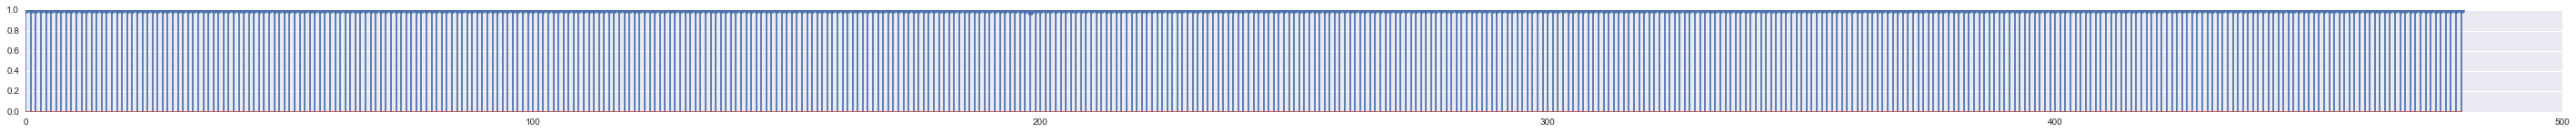

In [16]:
# 198번이 Outliner로 그림 상에서 출력, but 아웃라이어라고 판단되지 않으므로 그대로 포함.
plt.figure(figsize=(50, 2))
plt.stem(result.outlier_test().ix[:, -1])
plt.show()